In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import env
import wrangle, prepare

In [2]:
telco_df = wrangle.wrangle_telco()

In [3]:
telco_df

,customer_id,monthly_charges,tenure,total_charges,churn
5348,0040-HALCW,20.40,54.0,1090.60,No
5349,0042-RLHYP,19.70,69.0,1396.90,No
5350,0057-QBUQH,25.10,43.0,1070.15,No
5351,0064-SUDOG,20.30,12.0,224.50,No
5352,0071-NDAFP,25.50,25.0,630.60,No
...,...,...,...,...,...
7038,9919-FZDED,84.10,72.0,5981.65,No
7039,9926-PJHDQ,76.80,72.0,5468.45,No
7040,9928-BZVLZ,49.85,12.0,552.10,No
7041,9993-LHIEB,67.85,67.0,4627.65,No


In [4]:
train, validate, test = prepare.train_validate_test_split(telco_df)

In [5]:
def plot_variable_pairs(data_set):
    sns.pairplot(data_set, hue="churn")
    return train

,customer_id,monthly_charges,tenure,total_charges,churn
6604,3298-QEICA,34.60,23.0,813.45,No
5573,3457-PQBYH,20.30,58.0,1160.75,No
6010,0572-ZJKLT,99.65,46.0,4630.20,No
5976,9814-AOUDH,19.50,53.0,1050.50,No
6172,4513-CXYIX,80.70,71.0,5676.00,No
...,...,...,...,...,...
5789,6928-ONTRW,19.70,72.0,1379.80,No
5446,1535-VTJOQ,25.15,24.0,553.00,No
6234,6035-RIIOM,97.20,54.0,5129.45,No
5670,5006-MXVRN,20.70,39.0,762.45,No


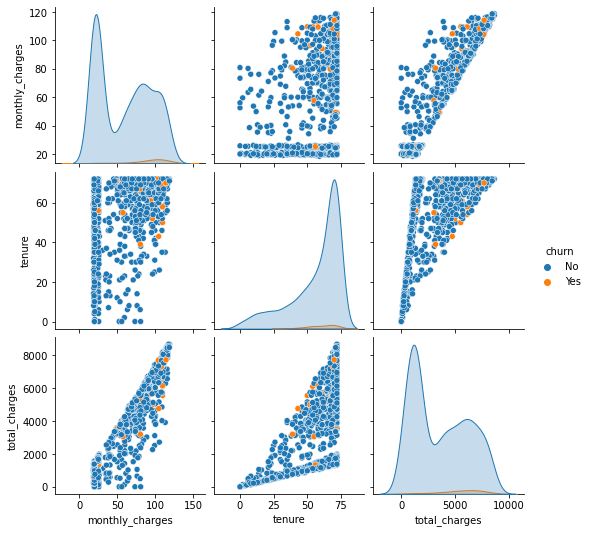

In [6]:
plot_variable_pairs(train)

In [7]:
def months_to_years(data_set):
    data_set['tenure_years'] = round(data_set.tenure / 12, 0)
    data_set = data_set.rename(columns={'tenure': 'tenure_month'})
    return data_set

In [8]:
train = months_to_years(train)

In [9]:
def plot_categorical_and_continuous_vars(data_set, cat_var, con_var):
    sns.barplot(data=data_set, y=con_var, x=cat_var)
    plt.show()
    sns.violinplot(data=data_set, y=con_var, x=cat_var)
    plt.show()
    sns.boxplot(data=data_set, y=con_var, x=cat_var)
    plt.show()

In [10]:
explore.plot_categorical_and_continuous_vars(train, train['churn'], train['monthly_charges'])

NameError: name 'explore' is not defined

In [ ]:
sns.heatmap(train.corr(), cmap='Greens', annot=True, linewidth=0.5, mask= np.triu(train.corr()))